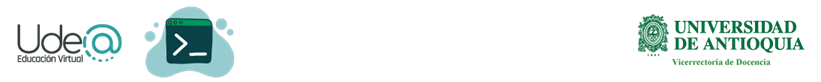

# <h1><center>Analyzing Clustering with Silhouette Tutorial</center></h1>

**Especialización en Analítica de Datos**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*


**2025-1**


# Silhouette Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples

SEED = 42

## Training Kmeans

In [14]:
def scatter_plot(X, y=None):
  plt.style.use("fivethirtyeight")
  fig, ax = plt.subplots(figsize=(7, 4))

  if y is None:
    ax.scatter(X[:, 0], X[:, 1], marker=".", s=10)
  else:
    ax.scatter(X[:, 0], X[:, 1], marker=".", s=10, c=y)

  ax.set_xlabel("$x_1$", fontsize=14)
  ax.set_ylabel("$x_2$", fontsize=14)
  ax.tick_params(axis='both', labelsize=8)

  ax.grid(False)
  plt.tight_layout()

  plt.savefig("scatter.png", dpi=600, transparent=True)

  plt.show()

In [3]:
def train_kmeans(X):
  ks = np.linspace(2, 8, 7, dtype=np.int64)
  inertias = []
  silhouettes = []
  kmeans_k = []
  for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=SEED)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
    kmeans_k.append(kmeans)

  return kmeans_k, inertias, silhouettes, ks

In [43]:
blob_centers = np.array(
    [[2.90, 6.50],
     [2.50, 2.50],
     [1.80, 5.50],
     [3.55, 3.50],
     [3.45, 4.30]]
)

blob_std = np.array([0.1, 0.2, 0.1, 0.1, 0.1])

In [44]:
X, y = make_blobs(n_samples=2000, n_features=2, centers=blob_centers,
                  cluster_std=blob_std, random_state=SEED)

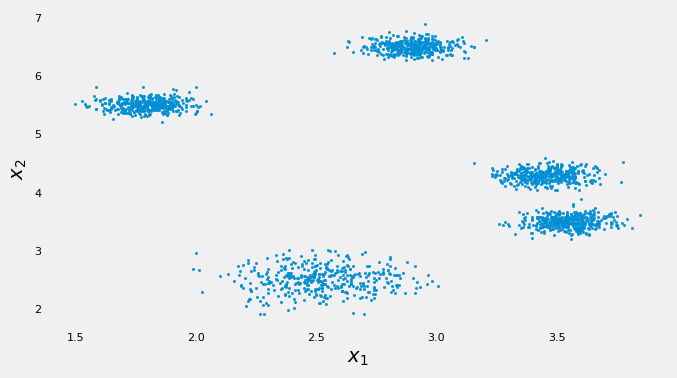

In [45]:
scatter_plot(X)

In [46]:
kmeans_k, inertias, silhouettes, ks = train_kmeans(X)

In [47]:
print(inertias)

[1400.498722800119, 632.5727924969215, 192.29809718684564, 63.70282184638694, 52.01147691087512, 49.52074835908778, 42.8901076622057]


<h2>Elbow Method and Silhouette Analysis</h2>

<h3>Elbow Method</h3>
<p>
    The Elbow Method is a widely used technique to determine the optimal number of clusters in a dataset. It involves plotting the sum of squared distances from each point to its assigned cluster center (known as the Within-Cluster Sum of Squares, or WCSS) against the number of clusters. As the number of clusters increases, WCSS typically decreases. The goal is to identify the "elbow point" on the plot, where the rate of decrease sharply slows down, indicating that adding more clusters beyond this point offers diminishing returns in terms of explained variance. The number of clusters corresponding to this elbow point is often considered optimal.
</p>
<p>
    The equation for WCSS is given by:
</p>
<p>
    <img src="https://latex.codecogs.com/png.image?\dpi{110}\text{WCSS}(k)=\sum_{i=1}^{k}\sum_{x\in%20C_i}\|x-\mu_i\|^2" alt="WCSS Equation">
</p>
<p>
    Where:
    <ul>
        <li><strong>k</strong> is the number of clusters.</li>
        <li><strong>C<sub>i</sub></strong> is the set of points in cluster i.</li>
        <li><strong>μ<sub>i</sub></strong> is the centroid of cluster i.</li>
        <li><strong>||x - μ<sub>i</sub>||<sup>2</sup></strong> is the squared Euclidean distance between a point x and the centroid μ<sub>i</sub>.</li>
    </ul>
</p>

<h3>Silhouette Analysis</h3>
<p>
    Silhouette Analysis is a method used to evaluate the quality of clustering by measuring how similar an object is to its own cluster compared to other clusters. For each data point, the Silhouette coefficient is calculated as follows:
</p>
<p>
    <strong>a</strong>: The average distance between the point and all other points in the same cluster.<br>
    <strong>b</strong>: The average distance between the point and all points in the nearest cluster (the one it is not a part of).
</p>
<p>
    The Silhouette coefficient for a data point is then computed as:
</p>
<p>
    <img src="https://latex.codecogs.com/png.image?\dpi{110}s=\frac{b-a}{\max(a,b)}" alt="Silhouette Coefficient">
</p>
<p>
    This coefficient ranges from -1 to 1, where:
    <ul>
        <li><strong>+1</strong>: The data point is well clustered, with the distance to its own cluster much smaller than to the nearest other cluster.</li>
        <li><strong>0</strong>: The data point is on or very close to the decision boundary between two neighboring clusters.</li>
        <li><strong>-1</strong>: The data point might have been assigned to the wrong cluster, as the distance to the nearest cluster is smaller than to its own cluster.</li>
    </ul>
</p>
<p>
    Silhouette analysis can be used to assess the consistency within clusters and can also help determine the optimal number of clusters by averaging the Silhouette scores across all data points for different numbers of clusters. A higher average Silhouette score indicates better-defined clusters.
</p>


In [48]:
print(inertias)

[1400.498722800119, 632.5727924969215, 192.29809718684564, 63.70282184638694, 52.01147691087512, 49.52074835908778, 42.8901076622057]


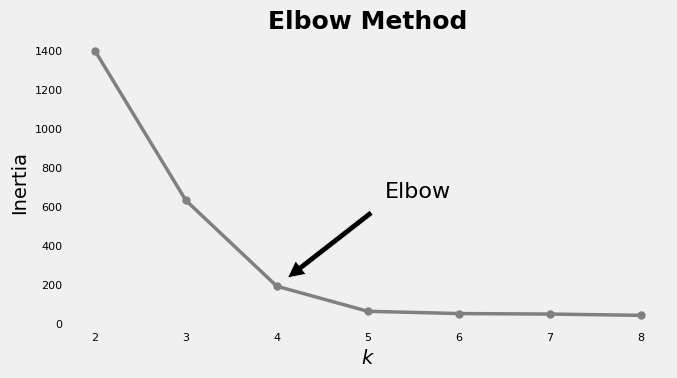

In [49]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(ks, inertias, "o-", color="grey", linewidth=2.5, markersize=5)

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Inertia", fontsize=14)
ax.tick_params(axis='both', labelsize=8)

ax.set_title("Elbow Method", fontsize=18, fontweight="bold")
ax.grid(False)

ax.annotate("Elbow",
            xy=(4, inertias[2]),
            xytext=(0.55, 0.45),
            textcoords="figure fraction",
            fontsize=16,
            arrowprops=dict(facecolor="black", shrink=0.1)
            )

plt.tight_layout()
plt.savefig("elbow.png", dpi=600, transparent=True)
plt.show()

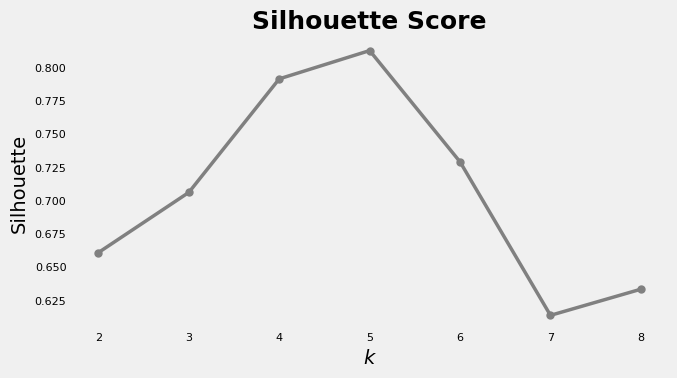

In [50]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(ks, silhouettes, "o-", color="grey", linewidth=2.5, markersize=5)

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Silhouette", fontsize=14)
ax.tick_params(axis='both', labelsize=8)

ax.set_title("Silhouette Score", fontsize=18, fontweight="bold")
ax.grid(False)

# ax.annotate("silhouette score = {:.2f}".format(silhouettes[3]),
#             xy=(5, silhouettes[3]),
#             xytext=(0.65, 0.8),
#             textcoords="figure fraction",
#             fontsize=12,
#             arrowprops=dict(facecolor="black", shrink=0.1)
#             )

plt.tight_layout()
plt.savefig("silhouette_score.png", dpi=600, transparent=True)
plt.show()

## Silhouette Diagram

### Complete diagram

<h2>Silhouette Analysis for Evaluating Clustering Quality</h2>

<p>
    Silhouette Analysis is a technique used to evaluate the quality of clustering by measuring how similar a data point is to its own cluster compared to other clusters. It provides a visual representation of the compactness and separation of clusters formed by a clustering algorithm, such as KMeans.
</p>

<p>
    In the analysis below, we vary the number of clusters (k) from 3 to 6 and generate both a Silhouette diagram and a scatter plot of the clustered data. The Silhouette diagram on the left side displays the silhouette coefficient values for each sample, where a higher value indicates that the sample is well-clustered. The dotted vertical line represents the average silhouette score, offering a global assessment of the clustering quality.
</p>

<p>
    The scatter plot on the right side shows the distribution of the data points, colored according to their cluster assignment. The cluster centers are marked with white circles, and the cluster labels are overlaid on the centers.
</p>

<p>
    By comparing the silhouette diagrams and scatter plots across different values of k, we can identify the optimal number of clusters that balances cluster compactness and separation, thereby maximizing the clustering quality.
</p>


For n_clusters = 3 The average silhouette_score is : 0.7063750465072979
For n_clusters = 4 The average silhouette_score is : 0.7917854452843498
For n_clusters = 5 The average silhouette_score is : 0.8130710254667672
For n_clusters = 6 The average silhouette_score is : 0.7293443298973984


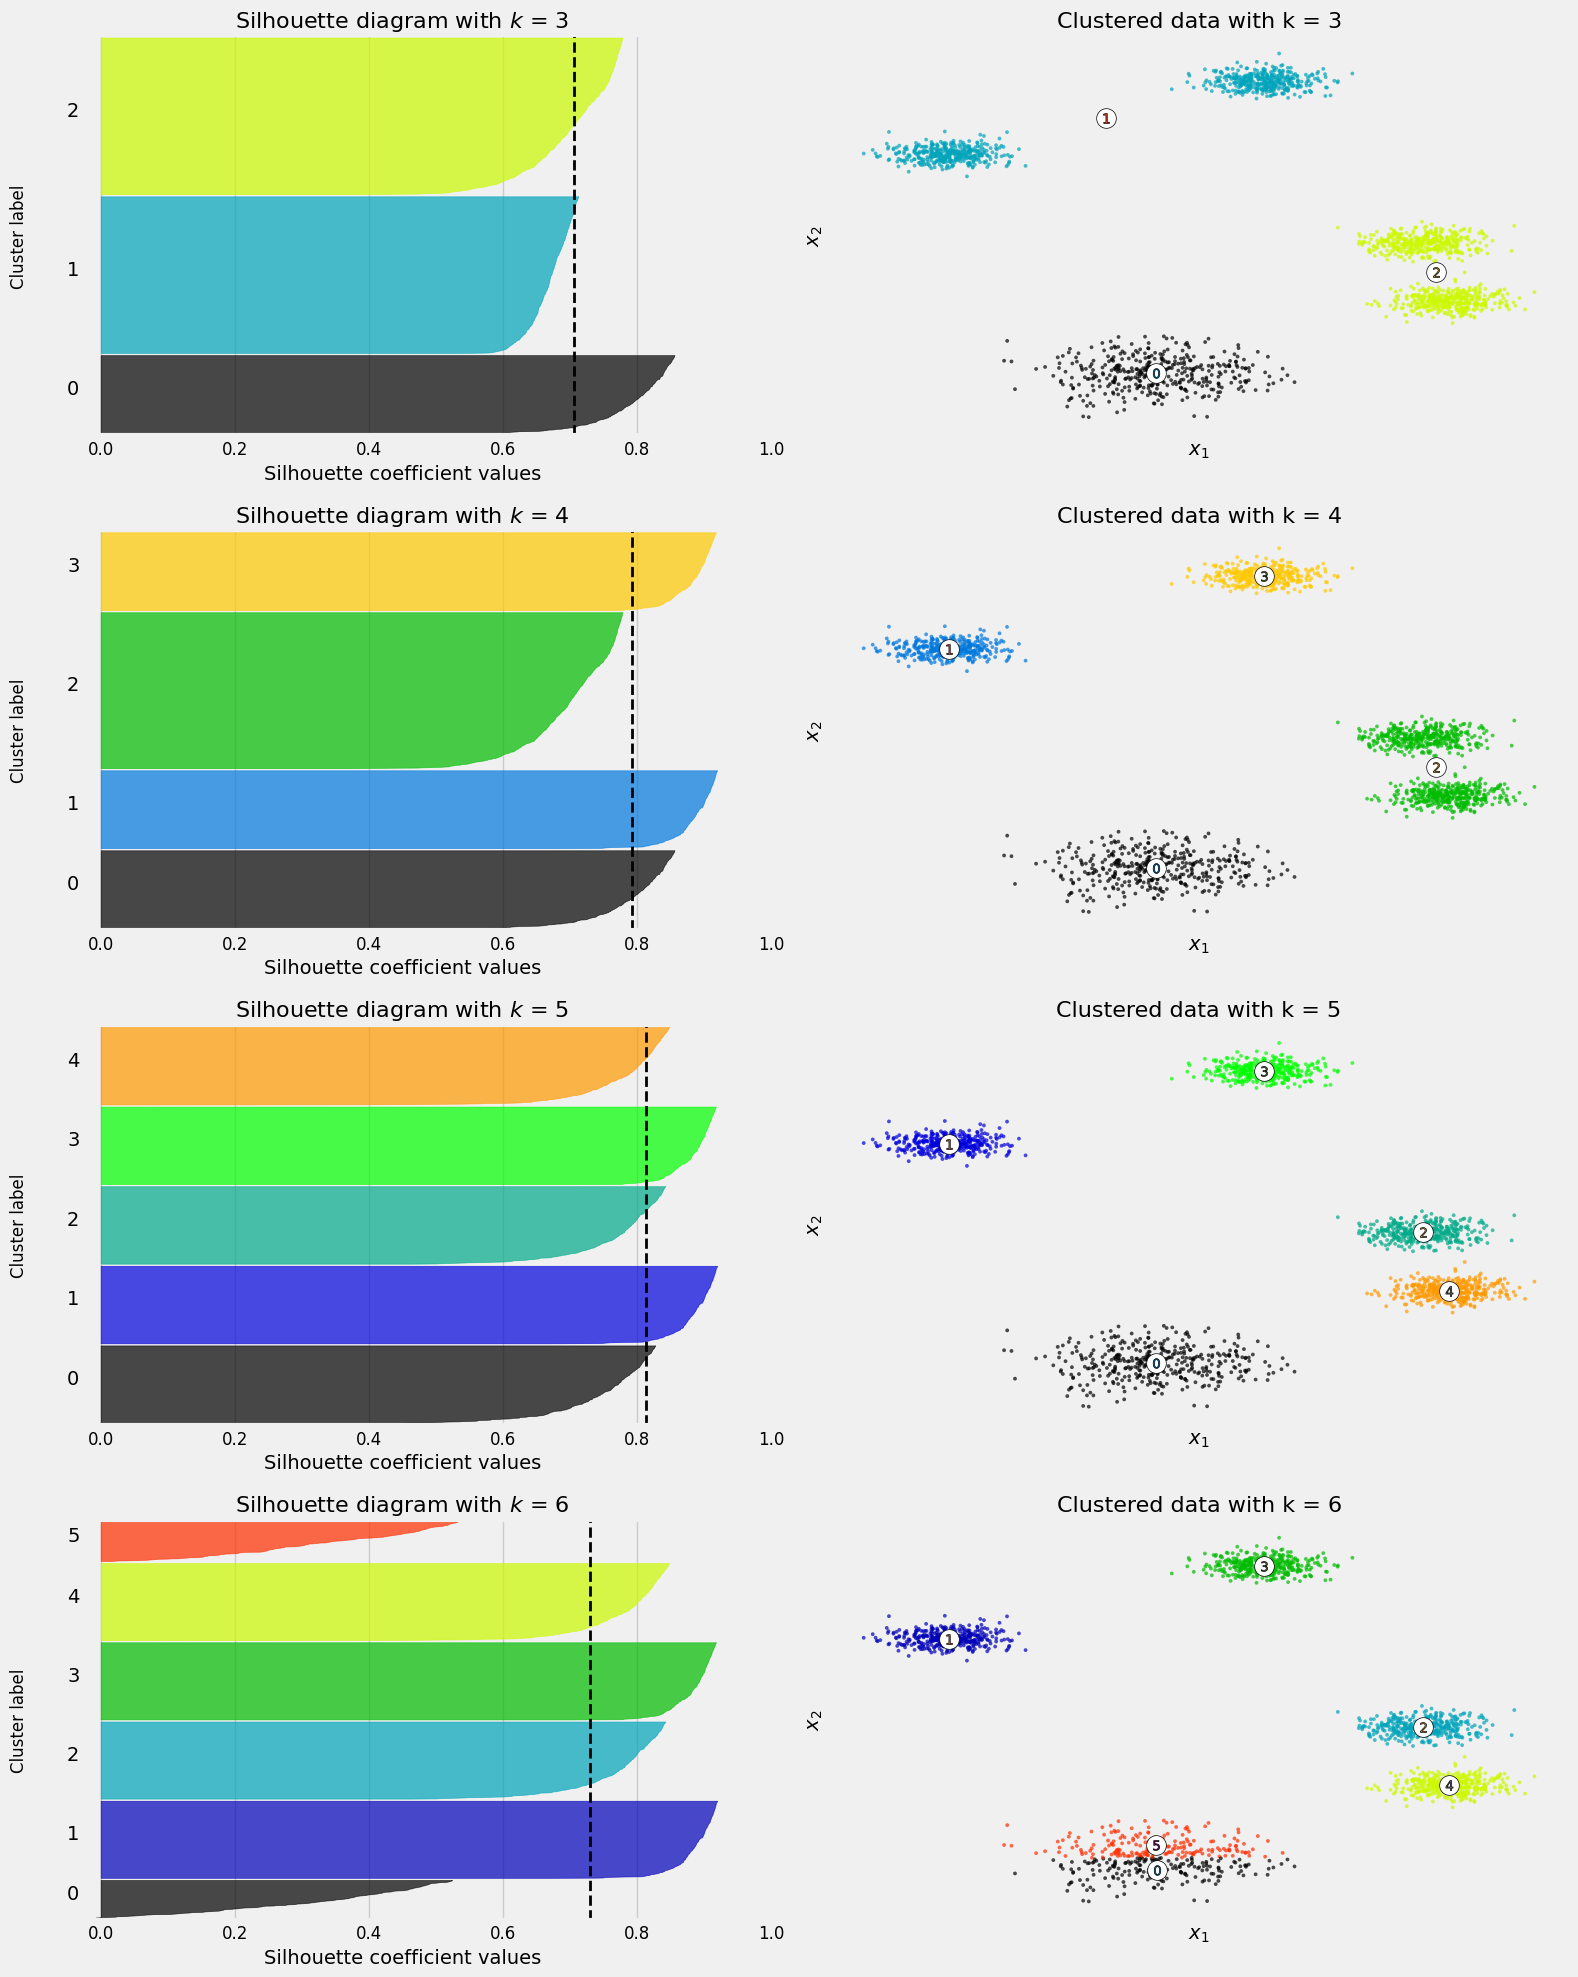

In [51]:
range_n_clusters = [3, 4, 5, 6]

fig, ax = plt.subplots(4, 2, figsize=(16, 20))

# [0, 0] [0, 1]
# [1, 0] [1, 1]
# [2, 0] [2, 1]
# [3, 0] [3, 1]

for row, n_clusters in enumerate(range_n_clusters):

  # Create a subplot with 1 row and 2 columns
  # fig, (ax1, ax2) = plt.subplots(1, 2)

  # fig.set_size_inches(12, 6)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax[row, 0].set_xlim([-0.1, 1])

  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax[row, 0].set_ylim([0, len(X) + (n_clusters + 1) * 10])

  # get predictions for each label
  cluster_labels = kmeans_k[n_clusters-2].predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette score for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[row, 0].fill_betweenx(np.arange(y_lower, y_upper),
                           0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[row, 0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax[row, 0].set_title("Silhouette diagram with $k$ = {}".format(n_clusters), fontsize=16)
  ax[row, 0].set_xlabel("Silhouette coefficient values", fontsize=14)
  ax[row, 0].set_ylabel("Cluster label", fontsize=12)

  ax[row, 0].set_yticks([])  # Clear the yaxis labels / ticks
  ax[row, 0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
  ax[row, 0].tick_params(axis='both', which='major', labelsize=12)

  # The vertical line for average silhouette score of all the values
  ax[row, 0].axvline(x=silhouette_avg, color="black", linestyle="--", linewidth=2)

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax[row, 1].scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                     c=colors, edgecolor='k')

  # Labeling the clusters
  centers = kmeans_k[n_clusters-2].cluster_centers_
  # Draw white circles at cluster centers
  ax[row, 1].scatter(centers[:, 0], centers[:, 1], marker='o',
                     c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax[row, 1].scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                       s=50, edgecolor='k')

  ax[row, 1].set_title(f"Clustered data with k = {n_clusters}", fontsize=16)
  ax[row, 1].set_xlabel("$x_1$", fontsize=14)
  ax[row, 1].set_ylabel("$x_2$", fontsize=14)
  ax[row, 1].set_yticks([])  # Clear the yaxis labels / ticks
  ax[row, 1].set_xticks([])

  ax[row, 1].grid(False)

  # fig.suptitle(("Silhouette analysis for KMeans clustering "
  # "with $k$ = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("silhouette_diagram.png", dpi=650, transparent=False)
plt.show()

### Simplified Diagram


<p>
    In this analysis, we visualize the Silhouette coefficients for K-Means clustering with different values of clusters (k = 3, 4, 5, 6). Silhouette coefficients provide insight into the quality of clustering by measuring how similar a data point is to its own cluster compared to other clusters.
</p>

<p>
    For each subplot corresponding to a different value of <em>k</em>, we plot the Silhouette coefficients for all data points. The data points are grouped by their cluster label, and the silhouette values are sorted within each cluster for a clearer visual interpretation.
</p>

<p>
    Each cluster's silhouette coefficients are represented by a filled area plot, with different colors indicating different clusters. The average silhouette score for each clustering is marked with a vertical red dashed line, providing a reference point to assess the overall clustering quality. A higher average silhouette score suggests better-defined and more distinct clusters.
</p>

<p>
    The y-axis in each subplot indicates the cluster labels, while the x-axis represents the range of silhouette coefficient values, which typically lie between -1 and 1. The clusters with the highest silhouette scores are generally more compact and well-separated from other clusters.
</p>

<p>
    This visualization allows us to compare the clustering performance across different values of <em>k</em> and identify the number of clusters that produces the most well-defined groups of data points, as indicated by consistently high silhouette scores.
</p>


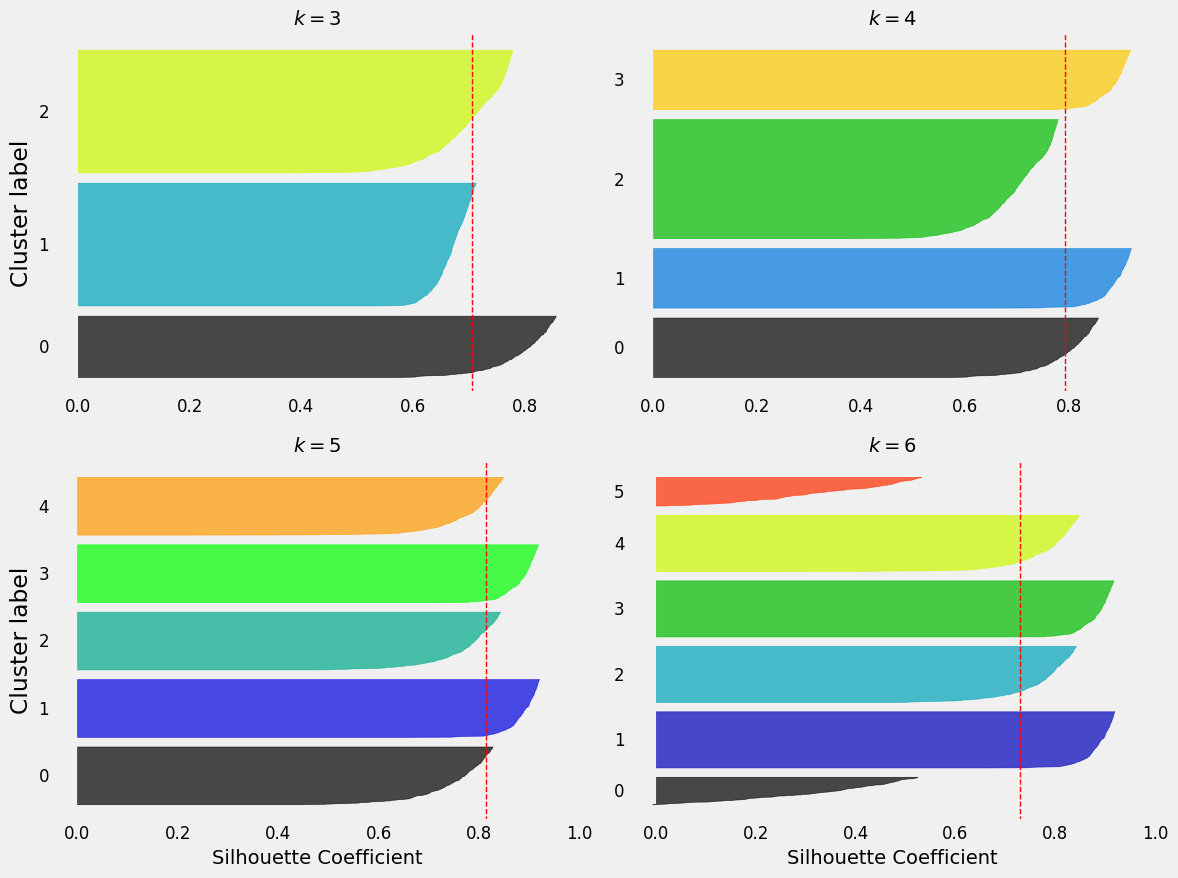

In [53]:
plt.figure(figsize=(12, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.nipy_spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster label")

    if k in (5, 6):
      plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient", fontsize=14)
    # else:
    #     plt.tick_params(labelbottom=False)
    plt.tick_params(labelsize=12)
    plt.axvline(x=silhouettes[k - 2], color="red", linestyle="--", linewidth=1)
    plt.title("$k={}$".format(k), fontsize=14, fontweight="bold")

    plt.grid(False)

plt.tight_layout()
plt.show()

<h2>K-Means Clustering Decision Boundaries</h2>

<p>
    In this analysis, we visualize the decision boundaries created by the K-Means clustering algorithm for different values of clusters (k = 3, 4, 5, 6). The decision boundaries represent the regions in the feature space where each data point would be assigned to the nearest cluster center.
</p>

<p>
    The decision boundaries are plotted on a fine mesh grid, and each region is color-coded according to the cluster assigned by the K-Means algorithm. The black contours indicate the exact boundaries between different clusters.
</p>

<p>
    The cluster centers are marked with large white circles, and the cluster labels are overlaid on these centers. The scatter plots of the data points show the actual distribution of the dataset within each decision boundary region.
</p>

<p>
    By examining these plots, we can gain insights into how the K-Means algorithm partitions the data space for different numbers of clusters. The decision boundaries help to visualize the influence each cluster center has on its surrounding data points and how the partitions change as the number of clusters increases.
</p>

<p>
    This approach is particularly useful for understanding the behavior of the K-Means algorithm and its sensitivity to the initial number of clusters. It also provides a clear visual representation of the decision boundaries, which is essential for interpreting the results of clustering in a two-dimensional feature space.
</p>


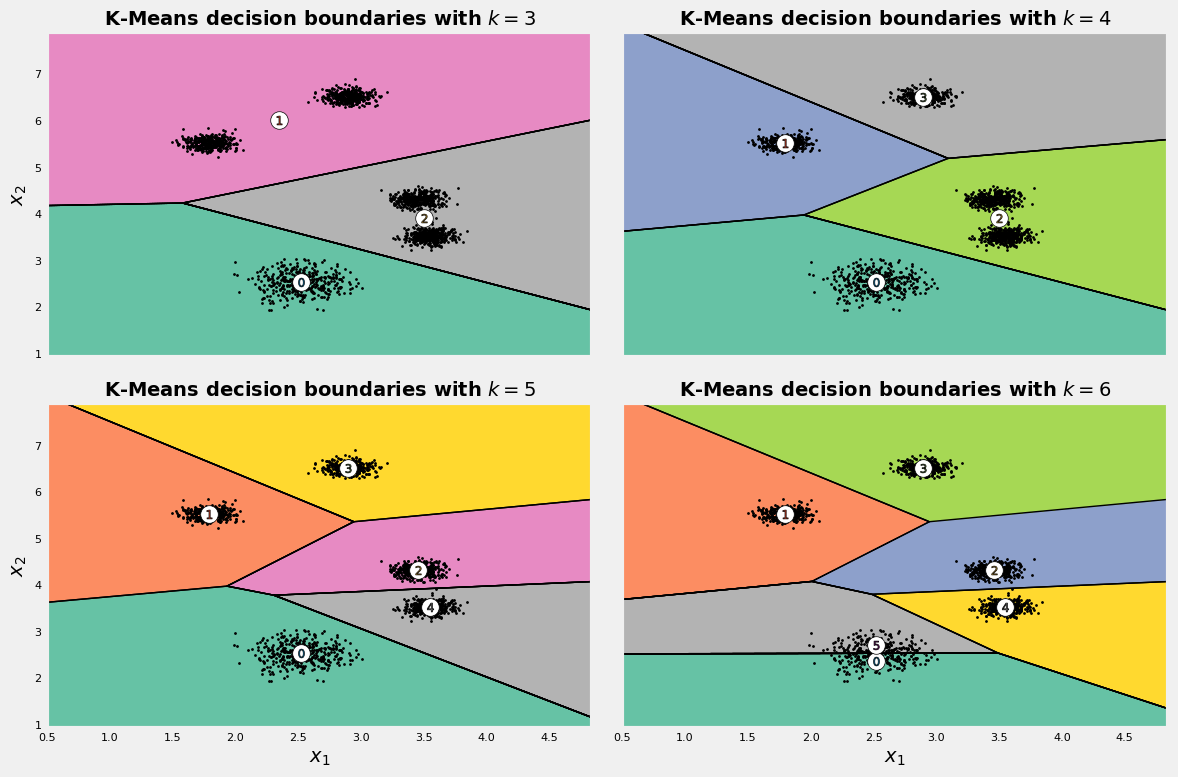

In [54]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# [0, 0] [0, 1]
# [1, 0] [1, 1]

for i, j, k in zip([0, 0, 1, 1], [0, 1, 0, 1], [3, 4, 5, 6]):

  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans_k[k-2].predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  ax[i, j].contourf(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap="Set2")
  ax[i, j].contour(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              linewidths=1, colors='k')

  ax[i, j].plot(X[:, 0], X[:, 1], 'k.', markersize=2)

  centers = kmeans_k[k-2].cluster_centers_
  ax[i, j].scatter(centers[:, 0], centers[:, 1], marker='o',
                  c="white", alpha=1, s=160, edgecolor='k', zorder=5)
  for cluster_idx, c in enumerate(centers):
    ax[i, j].scatter(c[0], c[1], marker='$%d$' % cluster_idx, alpha=1,
                    s=40, edgecolor='k', zorder=10)

  ax[i, j].set_title("K-Means decision boundaries with $k = {}$".format(k),
                    fontsize=14, fontweight="bold")

  if k % 2 == 1:
    ax[i, j].set_ylabel("$x_2$", fontsize=14)

  if k >= 5:
    ax[i, j].set_xlabel("$x_1$", fontsize=14)

  ax[i, j].tick_params(axis='both', labelsize=8)

  ax[i, j].grid(False)

plt.tight_layout()
plt.savefig("decision_boundaries.png", dpi=800, transparent=True)
plt.show()